## Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem statement
- Objective : Car purchasing price predictions. 

- Summary : As a vehicle salesperson, the main objective is to estimate the overall amount that consumers would spend on buying a new vehicle. The main Objective of this model is to predict the net amount that a customer would likely spend.

## 2) Data Collection
    Data source : Cardekho website, Zillow, Kaggle

### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv('dataset/car_purchasing.csv',encoding='latin-1')

#### Show Top 5 Records

In [3]:
df.head()

,customer name,JobTitle,customer e-mail,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [4]:
max(df['age'].unique())

70

#### Shape of the dataset

In [5]:
df.shape 

(500, 15)

In [6]:
df.describe(include='all')

,customer name,JobTitle,customer e-mail,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
count,500,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,0.0,500.000000,500.000000,500.000000,500.000000,500.000000
unique,498,82,500,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Seth,FIREFIGHTER,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Israel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,55,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.506000,46.224000,151066.630020,34445.373900,25762.908120,NaN,211274.912040,211274.912040,9607.645049,431475.713625,44209.799218
std,NaN,NaN,NaN,NaN,0.500465,7.990339,44402.930342,37322.379903,33597.479055,NaN,34040.951398,34040.951398,3489.187973,173536.756340,10773.178744
min,NaN,NaN,NaN,NaN,0.000000,20.000000,25400.000000,0.000000,0.000000,NaN,185724.500000,185724.500000,100.000000,20000.000000,9000.000000
25%,NaN,NaN,NaN,NaN,0.000000,41.000000,116316.357500,0.000000,10161.332500,NaN,192696.077500,192696.077500,7397.515792,299824.195900,37629.896040
50%,NaN,NaN,NaN,NaN,1.000000,46.000000,140546.895000,24079.420000,17475.785000,NaN,200595.255000,200595.255000,9655.035568,426750.120650,43997.783390
75%,NaN,NaN,NaN,NaN,1.000000,52.000000,188314.510000,64893.007500,28726.082500,NaN,217400.320000,217400.320000,11798.867487,557324.478725,51254.709517


#### 2.2 Dataset information
- customer name: name of customer
- JobTitle: Occupation name
- customer e-mail
- country:
- gender: encoded as 0,1
- age : 20 -70
- BasePay : average 151066
- OvertimePay : average 34445
- OtherPay: average 25762
- Benefits : NA
- TotalPay :average 211274	
- TotalPayBenefits : average 211274
- credit card debt : average 9607
- net worth : average 431475	
- car purchase amount: average 44209

#### 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [7]:
df.isnull().sum()

customer name            0
JobTitle                 0
customer e-mail          0
country                  0
gender                   0
age                      0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits               500
TotalPay                 0
TotalPayBenefits         0
credit card debt         0
net worth                0
car purchase amount      0
dtype: int64

##### Benefits columns have all null values we also dont required customer name and email address as this 2 dont add any value for data analysis and model prediction
#### Drop the unwanted column

In [8]:
df_new = df.drop(['customer name','customer e-mail','Benefits'],axis=1)

#### 3.2 Check Duplicate

In [9]:
df_new.duplicated().sum()

0

There are no duplicates values in the data set

#### 3.3 Check data types

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JobTitle             500 non-null    object 
 1   country              500 non-null    object 
 2   gender               500 non-null    int64  
 3   age                  500 non-null    int64  
 4   BasePay              500 non-null    float64
 5   OvertimePay          500 non-null    float64
 6   OtherPay             500 non-null    float64
 7   TotalPay             500 non-null    float64
 8   TotalPayBenefits     500 non-null    float64
 9   credit card debt     500 non-null    float64
 10  net worth            500 non-null    float64
 11  car purchase amount  500 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 47.0+ KB


#### 3.4 Checking the number of unique values of each column

In [11]:
df_new.nunique()

JobTitle                82
country                211
gender                   2
age                     43
BasePay                371
OvertimePay            329
OtherPay               437
TotalPay               491
TotalPayBenefits       491
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

#### 3.5 Check statistics of data set

In [12]:
df_new.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
JobTitle,500,82,FIREFIGHTER,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,500,211,Israel,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,500.0,NaN,NaN,NaN,0.506,0.500465,0.0,0.0,1.0,1.0,1.0
age,500.0,NaN,NaN,NaN,46.224,7.990339,20.0,41.0,46.0,52.0,70.0
BasePay,500.0,NaN,NaN,NaN,151066.63002,44402.930342,25400.0,116316.3575,140546.895,188314.51,294580.02
OvertimePay,500.0,NaN,NaN,NaN,34445.3739,37322.379903,0.0,0.0,24079.42,64893.0075,245131.88
OtherPay,500.0,NaN,NaN,NaN,25762.90812,33597.479055,0.0,10161.3325,17475.785,28726.0825,400184.25
TotalPay,500.0,NaN,NaN,NaN,211274.91204,34040.951398,185724.5,192696.0775,200595.255,217400.32,567595.43
TotalPayBenefits,500.0,NaN,NaN,NaN,211274.91204,34040.951398,185724.5,192696.0775,200595.255,217400.32,567595.43
credit card debt,500.0,NaN,NaN,NaN,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0


**Insights:**

- **JobTitle**: The most common job title is "FIREFIGHTER" with a frequency of 55 out of 500 entries.
- **Country**: The most common country is "Mauritania" with a frequency of 6 out of 500 entries.
- **Gender**: The dataset has a nearly equal distribution of genders with a mean of 0.506 (assuming 0 represents one gender and 1 represents the other).
- **Age**: The average age is approximately 46.22 years with a standard deviation of 7.99 years. The ages range from 20 to 70 years.
- **BasePay**: The average base pay is $151,066.63 with a standard deviation of $44,402.93. The base pay ranges from $25,400 to $294,580.02.
- **OvertimePay**: The average overtime pay is $34,445.37 with a standard deviation of $37,322.38. The overtime pay ranges from $0 to $245,131.88.
- **OtherPay**: The average other pay is $25,762.91 with a standard deviation of $33,597.48. The other pay ranges from $0 to $400,184.25.
- **TotalPay**: The average total pay is $211,274.91 with a standard deviation of $34,040.95. The total pay ranges from $185,724.5 to $567,595.43.
- **TotalPayBenefits**: The average total pay including benefits is the same as the total pay, indicating no additional benefits are considered.
- **Credit Card Debt**: The average credit card debt is $9,607.65 with a standard deviation of $3,489.19. The credit card debt ranges from $100 to $20,000.
- **Net Worth**: The average net worth is $431,475.71 with a standard deviation of $173,536.76. The net worth ranges from $20,000 to $1,000,000.
- **Car Purchase Amount**: The average car purchase amount is $44,209.80 with a standard deviation of $10,773.18. The car purchase amounts range from $9,000 to $80,000.

#### 4. Exploring Data ( Visualization )

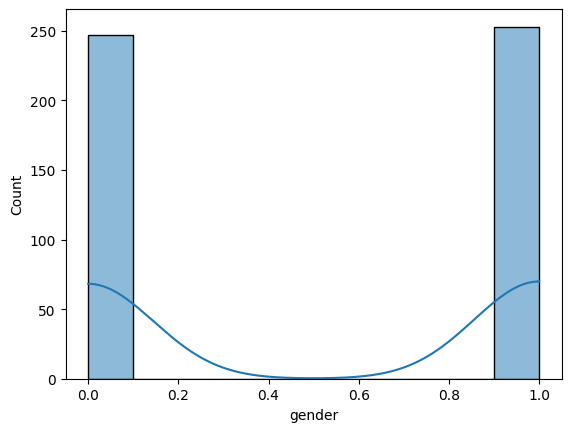

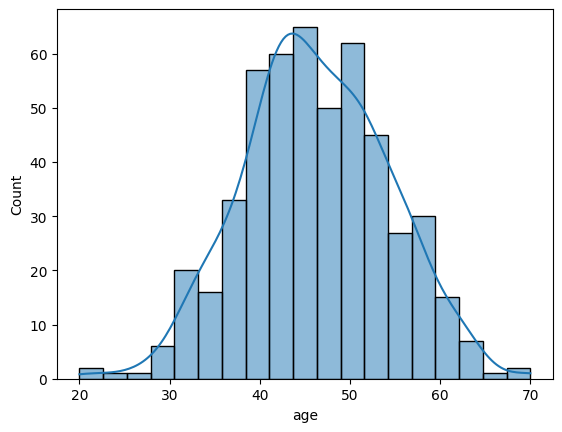

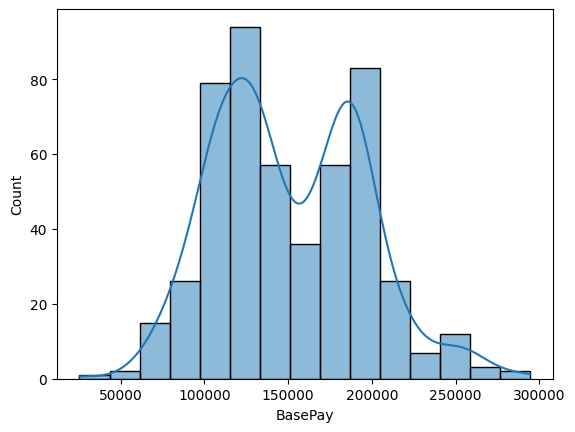

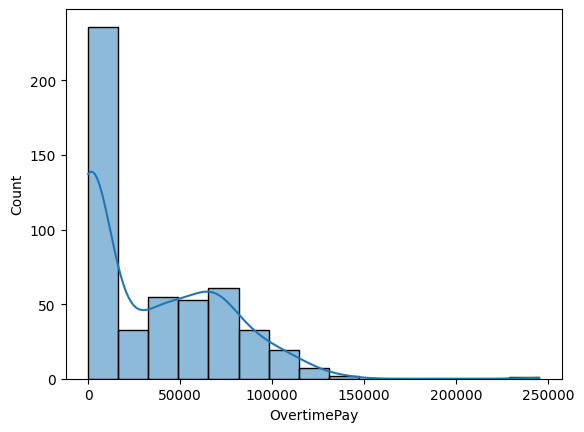

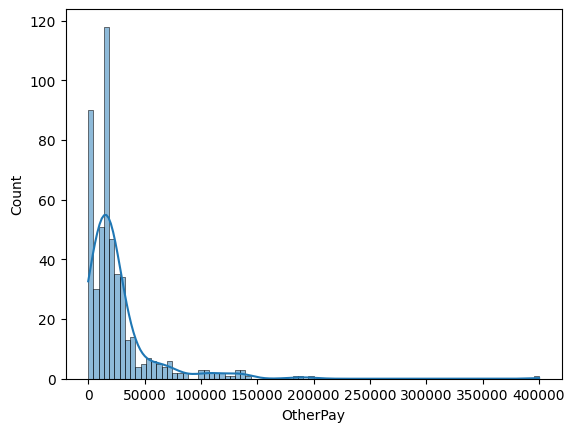

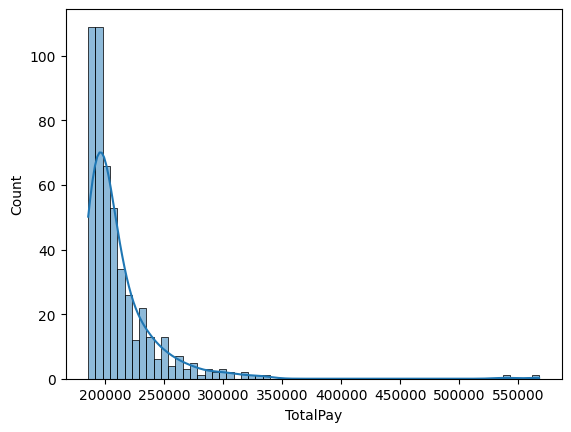

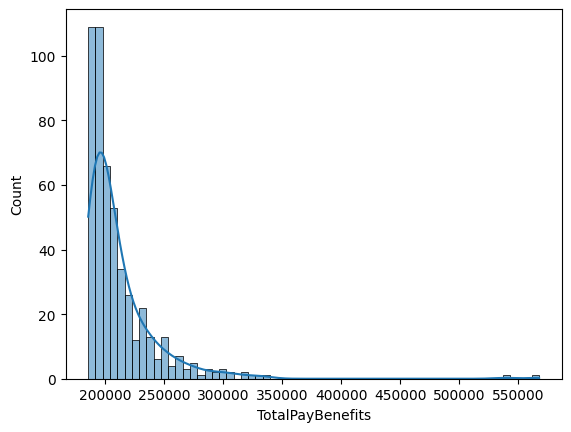

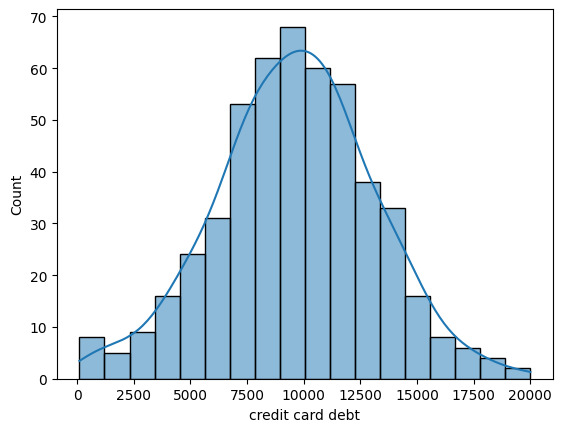

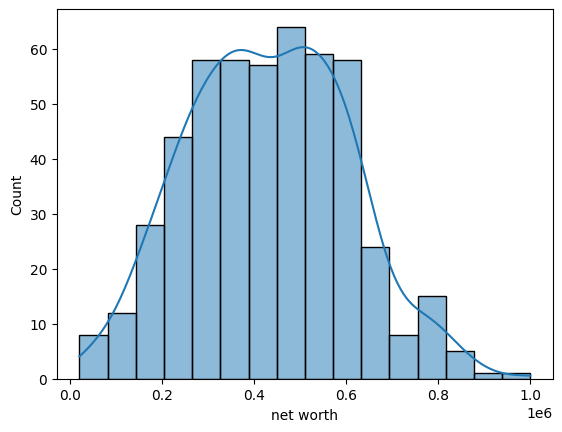

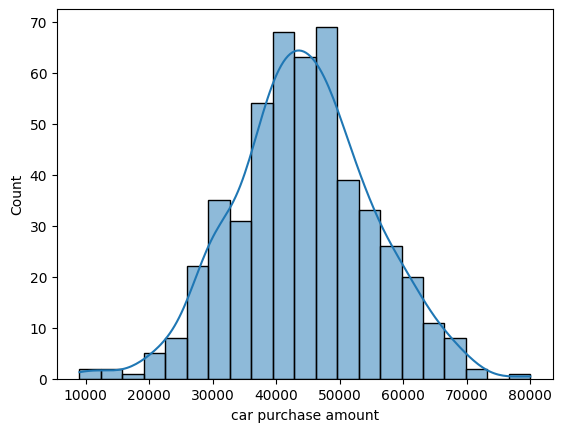

In [13]:
for col in df_new.columns:
    if df_new[col].dtype !='O':
        sns.histplot(data=df_new,x=col,kde=True)
        plt.show()

In [14]:
#### data for OvertimePay, OthePay and TotalPay and Paywithbenifit data are shifted to the right


In [15]:
df_num = df_new.select_dtypes(['int64','float'])


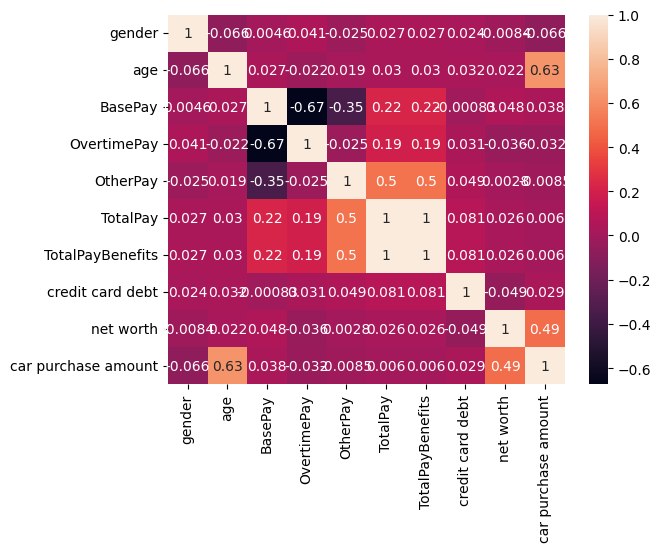

In [16]:

sns.heatmap(df_num.corr(), annot=True)
plt.show()

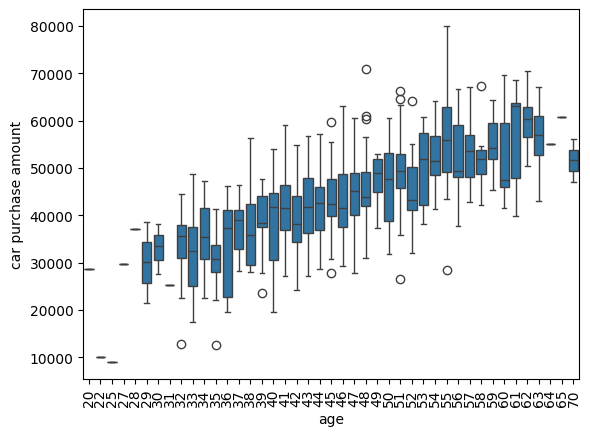

In [17]:
sns.boxplot(df_new,x='age',y='car purchase amount')
plt.xticks(rotation=90)
plt.show()

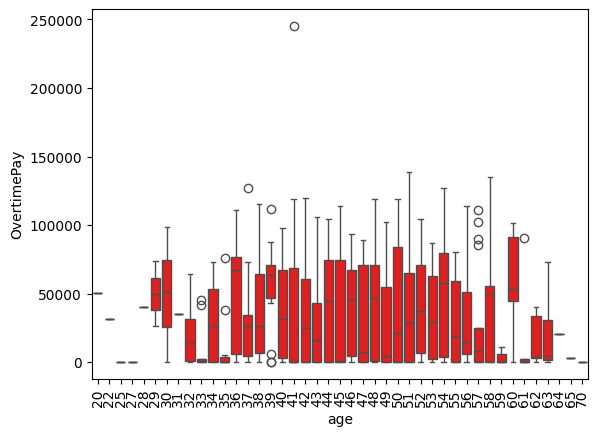

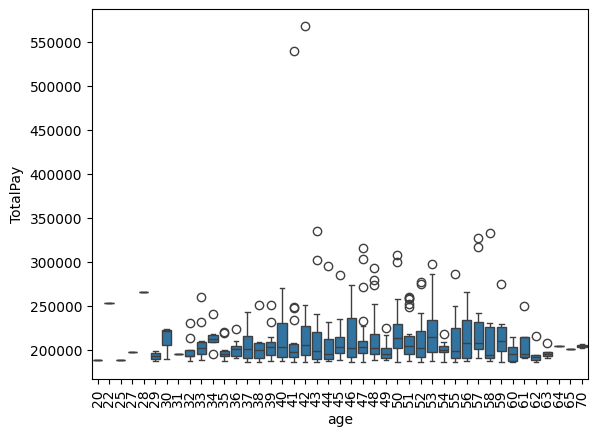

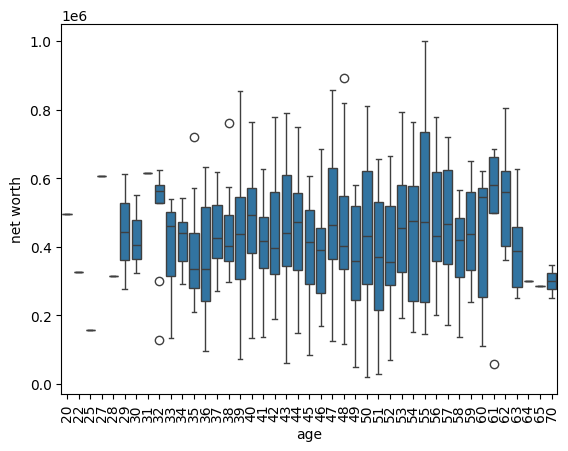

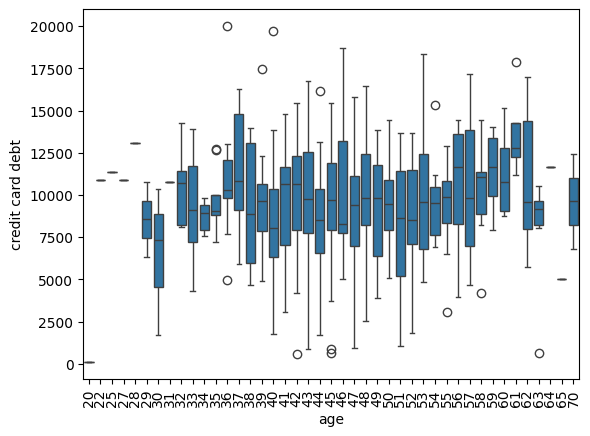

In [18]:
# age vs overtime pay, age vs Total pay, age vs networth, age vs credit card debt

sns.boxplot(x="age", y="OvertimePay", data=df,color="red")
plt.xticks(rotation=90)
plt.show()
sns.boxplot(x="age", y="TotalPay", data=df)
plt.xticks(rotation=90)
plt.show()
sns.boxplot(x="age", y="net worth", data=df)
plt.xticks(rotation=90)
plt.show()
sns.boxplot(x="age", y="credit card debt", data=df)
plt.xticks(rotation=90)
plt.show()

In [19]:
#### check negative value in data for OvertimePay, OthePay and TotalPay and Paywithbenifit columns

print(f"OvertimePay Neagtive values:{(df_new['OvertimePay']<0).sum()}")
print(f"OtherPay Neagtive values:{(df_new['OtherPay']<0).sum()}")
print(f"TotalPay Neagtive values:{(df_new['TotalPay']<0).sum()}")
print(f"TotalPayBenefits Neagtive values:{(df_new['TotalPayBenefits']<0).sum()}")



OvertimePay Neagtive values:0
OtherPay Neagtive values:0
TotalPay Neagtive values:0
TotalPayBenefits Neagtive values:0


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JobTitle             500 non-null    object 
 1   country              500 non-null    object 
 2   gender               500 non-null    int64  
 3   age                  500 non-null    int64  
 4   BasePay              500 non-null    float64
 5   OvertimePay          500 non-null    float64
 6   OtherPay             500 non-null    float64
 7   TotalPay             500 non-null    float64
 8   TotalPayBenefits     500 non-null    float64
 9   credit card debt     500 non-null    float64
 10  net worth            500 non-null    float64
 11  car purchase amount  500 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 47.0+ KB


#### now data is clean save it for model tarining

#### 

In [22]:
df_new.to_csv("dataset/car_price_purchasing_v1.csv",index=False)
